In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Text(0, 0.5, '$CO_2$ (GigaTons Carbon)')

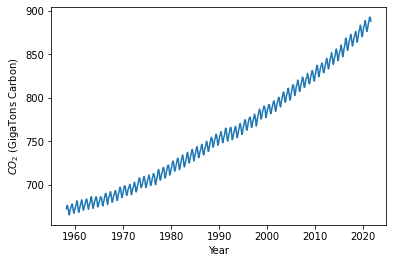

In [2]:
filename='Data/co2_mm_mlo.txt'
day=np.loadtxt(filename).T[2]
co2=np.loadtxt(filename).T[3]
gtc=2.13 # global tons of carbon for 1 ppm
plt.plot(day,co2*gtc)
plt.xlabel('Year')
plt.ylabel('$CO_2$ (GigaTons Carbon)')

Text(0, 0.5, '$CO_2$ (GigaTons Carbon)')

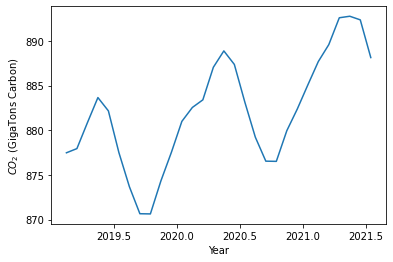

In [3]:
plt.plot(day[-30:],co2[-30:]*gtc)
plt.xlabel('Year')
plt.ylabel('$CO_2$ (GigaTons Carbon)')

There is more CO2 in the atmosphere in Northern Spring and less in the Fall. This reflects the fact that throughout the winter the plants are decaying and returing CO2 to the atmosphere. Then in the Spring, the plants start recapturing the CO2 to grow so that by Fall the atmospheric CO2 is a minimum.

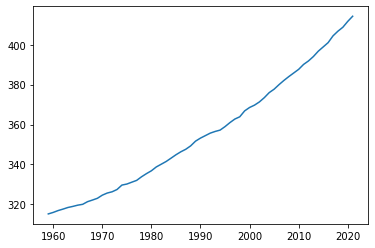

In [4]:
## Get the mean co2 in a given year
cyear=[]
for d in day:
    cyear.append(np.floor(d))
oldy=0.
year=[]
coy=[]
co=0.
for i,y in enumerate(cyear):
   if (y==oldy): 
       co+=co2[i]
       n+=1
   else:
       oldy=y
       if i > 0:
        year.append(y)
        coy.append(co/n)
       n=1
       co=co2[i]
plt.plot(year,coy)

In [5]:
%pwd


'/Users/scottdodelson/CMU/Courses/Energy'

In [7]:
co2=pd.read_csv('Data/owid-co2-data.csv')
temperature_year=np.loadtxt('Data/temperatures.txt').T[0]
temperature=np.loadtxt('Data/temperatures.txt').T[1]

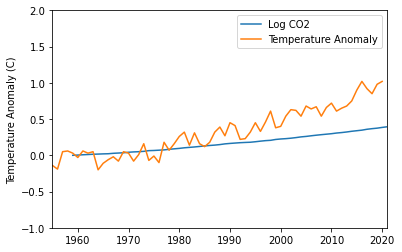

In [8]:
n=np.size(year)

plt.plot(year,np.log2(coy/coy[0]),label='Log CO2')
plt.plot(temperature_year,temperature,label='Temperature Anomaly')
plt.axis([1955,2021,-1,2])
plt.ylabel('Temperature Anomaly (C)')
plt.legend()


In [9]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             20930 non-null  object 
 1   country                              23708 non-null  object 
 2   year                                 23708 non-null  int64  
 3   co2                                  23170 non-null  float64
 4   co2_growth_prct                      21907 non-null  float64
 5   co2_growth_abs                       22014 non-null  float64
 6   consumption_co2                      3350 non-null   float64
 7   trade_co2                            3318 non-null   float64
 8   trade_co2_share                      3318 non-null   float64
 9   co2_per_capita                       22380 non-null  float64
 10  consumption_co2_per_capita           3350 non-null   float64
 11  share_global_co2            

In [10]:
co2.head()

,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,NaN,0.002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN
1,AFG,Afghanistan,1950,0.084,475.000,0.070,NaN,NaN,NaN,0.011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951,0.092,8.696,0.007,NaN,NaN,NaN,0.012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10
3,AFG,Afghanistan,1952,0.092,NaN,NaN,NaN,NaN,NaN,0.012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10
4,AFG,Afghanistan,1953,0.106,16.000,0.015,NaN,NaN,NaN,0.013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10


In [11]:
co2.describe()

,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,consumption_co2_per_capita,share_global_co2,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
count,23708.000000,23170.000000,21907.000000,22014.000000,3350.000000,3318.000000,3318.000000,22380.000000,3350.000000,23100.000000,...,5155.000000,5211.000000,5157.000000,5211.000000,5157.000000,6044.000000,6044.000000,6044.000000,2.107100e+04,1.300200e+04
mean,1951.670997,270.245818,17.707864,5.733241,222.596056,3.673305,27.047046,4.059419,6.556161,5.143504,...,8.099506,82.253370,2.046923,29.308135,0.606690,1638.281196,27401.710621,2.293554,5.927539e+07,4.396605e+11
std,53.828319,1509.911932,290.770226,54.592216,773.261390,100.251878,52.599781,15.340912,7.303592,17.985974,...,9.387477,566.702756,3.534126,199.291118,0.844671,9666.490291,33293.462203,1.681657,3.730743e+08,3.666682e+12
min,1750.000000,-1.165000,-2835.714000,-860.211000,-1.344000,-1487.155000,-118.238000,-2.675000,-0.396000,-0.030000,...,-50.487000,0.000000,0.000000,0.000000,0.000000,0.208000,111.472000,0.048000,1.000000e+03,6.378000e+07
25%,1922.000000,0.546000,-1.071000,-0.011000,8.942000,0.000000,0.000000,0.234000,1.100500,0.006000,...,2.514000,2.150000,0.715000,0.535000,0.228000,46.319000,5829.803000,1.247000,1.333018e+06,8.926728e+09
50%,1965.000000,5.168000,4.363000,0.088000,36.854000,2.348000,16.319500,1.208500,4.040000,0.071500,...,5.474000,9.030000,1.111000,3.590000,0.384000,148.790500,15359.988500,1.823500,4.856304e+06,2.966217e+10
75%,1993.000000,44.799000,11.453000,1.271000,141.397000,9.545500,40.842000,4.633000,9.829750,0.625000,...,10.299000,31.055000,1.690000,10.570000,0.607000,518.953000,37103.698250,2.700500,1.594407e+07,1.210000e+11
max,2019.000000,36441.388000,20100.000000,1667.711000,8959.962000,533.928000,1470.066000,794.334000,58.736000,100.000000,...,86.991000,8660.010000,39.812000,3054.000000,8.239000,153848.433000,317582.244000,14.939000,7.713468e+09,1.065610e+14


In [12]:

worst=co2[co2['co2']>36440.]
print(worst)

       iso_code country  year        co2  co2_growth_prct  co2_growth_abs  \
23450  OWID_WRL   World  2019  36441.388             0.06          21.676   

       consumption_co2  trade_co2  trade_co2_share  co2_per_capita  ...  \
23450              NaN        NaN              NaN           4.724  ...   

       ghg_per_capita  methane  methane_per_capita  nitrous_oxide  \
23450             NaN      NaN                 NaN            NaN   

       nitrous_oxide_per_capita  primary_energy_consumption  \
23450                       NaN                         NaN   

       energy_per_capita  energy_per_gdp    population  gdp  
23450                NaN             NaN  7.713468e+09  NaN  

[1 rows x 55 columns]


In [13]:
co2us=co2[co2['country']=='World']

In [30]:
emit=co2us['co2']
year=np.array(co2us['year'])

Text(0, 0.5, 'Global Carbon Emissions (GTons $CO_2$)')

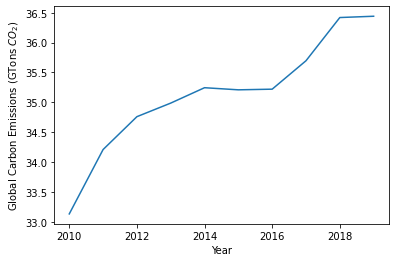

In [31]:
plt.plot(year[-10:],emit[-10:]/1.e3)
plt.xlabel('Year')
plt.ylabel('Global Carbon Emissions (GTons $CO_2$)')

Text(0, 0.5, 'Global Carbon Emissions (GTC)')

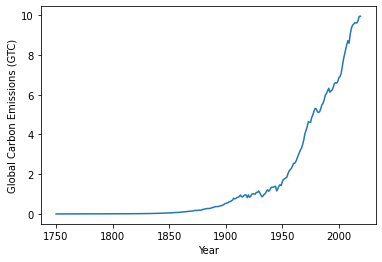

In [32]:
plt.plot(year,emit/3.664/1.e3)
plt.xlabel('Year')
plt.ylabel('Global Carbon Emissions (GTC)')

2019
441.1787658296943


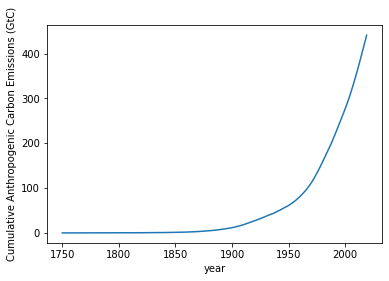

In [33]:
n=np.size(emit)
cum=np.zeros(n)
for i in range(n):
    cum[i]=np.sum(emit[:i])
plt.plot(year,cum/3.664/1.e3)
plt.xlabel('year')
plt.ylabel('Cumulative Anthropogenic Carbon Emissions (GtC)')
print(year[-1])
print(cum[-1]/3.664/1.e3)

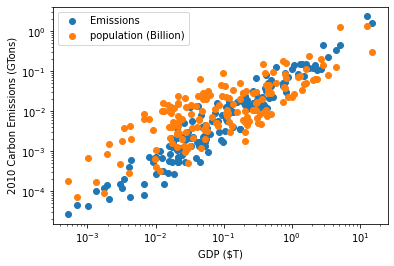

In [262]:
co22019=co2[co2['year']==2010]
co22019=co22019[co22019['country']!='World']
emissions=co22019['co2']
gdp=co22019['gdp']
population=co22019['population']

plt.scatter(gdp/1.e12,emissions/1.e3/3.664,label='Emissions')
plt.xlabel('GDP ($T)')
plt.ylabel('2010 Carbon Emissions (GTons)')
plt.scatter(gdp/1.e12,population/1.e9,label='population (Billion)')
plt.yscale('log')
plt.xscale('log')
plt.legend()

226
164
(164, 2) (164,)
[ 1.25485141 -0.25553558] -3.3547335662547084
0.9335752374248146


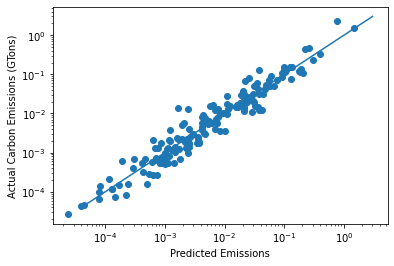

In [263]:
co22019=co2[co2['year']==2010]
co22019=co22019[co22019['country']!='World']
emissions=co22019['co2']
gdp=co22019['gdp']
population=co22019['population']
#Regression
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
## clean up nans
n=np.size(emissions)
print(n)
for i in gdp.index:
    if (np.isnan(gdp[i]) or np.isnan(emissions[i]) or np.isnan(population[i])): 
        del gdp[i]
        del emissions[i]
        del population[i]
n=np.size(emissions)
print(n)
emissions=emissions.values/1.e3/3.664
gdp=gdp.values/1.e12
population=population.values/1.e9
#gdp=gdp.reshape(-1,1)
#print(emissions)
#emissions=emissions.reshape(-1,1)
X=np.transpose([np.log(gdp),np.log(population)])
print(np.shape(X),np.shape(emissions))
lin_reg.fit(X,np.log(emissions))
print(lin_reg.coef_,lin_reg.intercept_)
x=np.arange(0,20,.0001)
#x.reshape(-1,1)
plt.scatter(np.exp(lin_reg.predict(X)),(emissions))#,label='2D Regression Fit')
#plt.scatter(gdp,emissions,label='Data')
plt.xlabel('Predicted Emissions')
plt.ylabel('Actual Carbon Emissions (GTons)')
plt.plot([5.e-5,3],[5.e-5,3])
#plt.axis([5.e-4,3,1.e-4,3])
plt.yscale('log')
plt.xscale('log')
print(lin_reg.score(X,np.log(emissions)))

If you extrapolate that fit to the world, which has a much higher population and GDP than any other point, what will happen? Well, maybe China is a good example: it has 1/7 of the population and the model tries to fit it but still under-predicts. So, likely for the world, the model will underpredict the actual emissions. And that is correct: the next box shows that the model predicts 6, while the data is 50% higher.

In [270]:
world=co2[co2['year']==2010]
world=world[world['country']=='World']
gdp=world['gdp'].values/1.e12
pop=world['population'].values/1.e9
emissions=world['co2'].values/3.664/1.e3
X=np.transpose([np.log(gdp),np.log(pop)])
print(np.exp(lin_reg.predict(X)))
print(emissions)

[5.89703261]
[9.04255213]


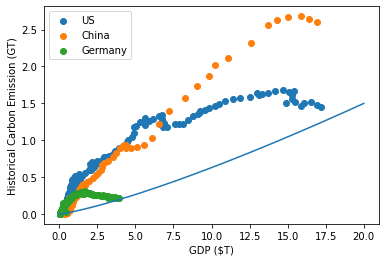

In [246]:
us=co2[co2['country']=='United States']
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
plt.scatter(ugdp,uco2,label='US')

us=co2[co2['country']=='China']
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
plt.scatter(ugdp,uco2,label='China')

us=co2[co2['country']=='Germany']
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
plt.scatter(ugdp,uco2,label='Germany')

x=np.arange(.01,20,.001)
plt.xlabel('GDP ($T)')
plt.ylabel('Historical Carbon Emission (GT)')
plt.plot(x,np.exp(lin_reg.coef_[0]*np.log(x)+lin_reg.intercept_))
plt.legend()


Text(0.5, 1.0, 'United States')

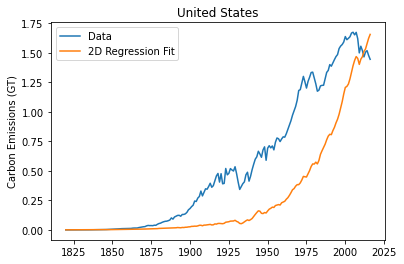

In [275]:
country='United States'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([np.log(ugdp),np.log(upop)])
plt.plot(yr,np.exp(lin_reg.predict(X)),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')
plt.title(country)


Text(0.5, 1.0, 'China')

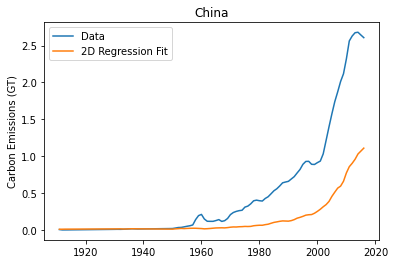

In [276]:
country='China'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([np.log(ugdp),np.log(upop)])
plt.plot(yr,np.exp(lin_reg.predict(X)),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')

plt.title(country)

Text(0.5, 1.0, 'India')

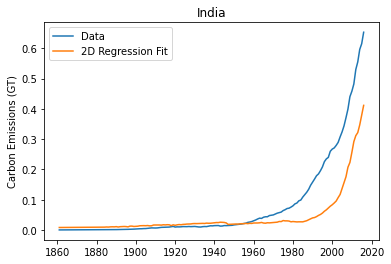

In [277]:
country='India'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([np.log(ugdp),np.log(upop)])
plt.plot(yr,np.exp(lin_reg.predict(X)),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')

plt.title(country)

Text(0.5, 1.0, 'Israel')

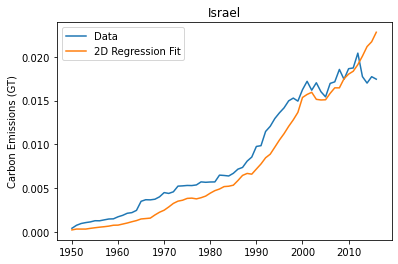

In [250]:
country='Israel'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([np.log(ugdp),np.log(upop)])
plt.plot(yr,np.exp(lin_reg.predict(X)),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')
plt.title(country)

Text(0.5, 1.0, 'Japan')

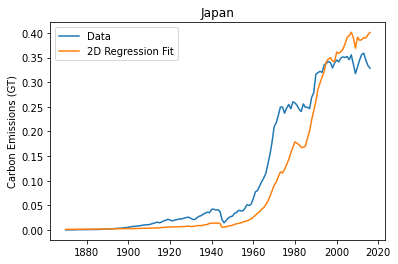

In [251]:
country='Japan'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([np.log(ugdp),np.log(upop)])
plt.plot(yr,np.exp(lin_reg.predict(X)),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')
plt.title(country)

Text(0.5, 1.0, 'World')

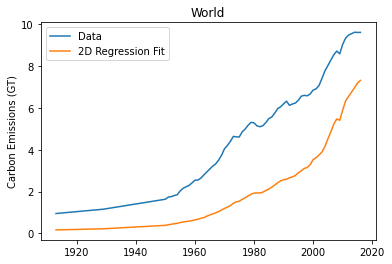

In [252]:
country='World'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([np.log(ugdp),np.log(upop)])
plt.plot(yr,np.exp(lin_reg.predict(X)),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')
plt.title(country)

Text(0.5, 1.0, 'Indonesia')

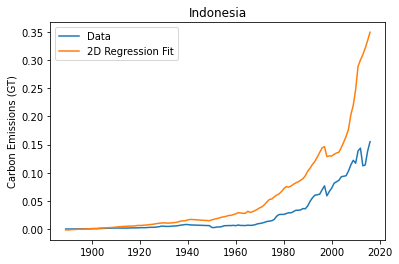

In [215]:
country='Indonesia'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([ugdp,upop])
plt.plot(yr,lin_reg.predict(X),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')
plt.title(country)